In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import math
from functools import partial

import bases
import eigensolvers
import functionals
import generators
import otrhogonalizations
import representations
import reconstructions
import utils

from test_base import TestEigenfuncNDTorus

In [2]:
class Test(TestEigenfuncNDTorus):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
    
    def test_run(self):
        Yr, Xr = self.get_settings()
        self.K, self.V, self.L = self.representation_func(Yr, basis=self.basis)
        _, self.true_V, _ = eigensolvers.QR_algorithm_with_inverse_iteration(self.K)
        _, self.power_V, _ = eigensolvers.QR_algorithm_with_power_vector(self.K, self.basis, Yr.shape[1])
        print(self.V.shape)
        self.show_E1_value(self.power_V, self.true_V, self.L)
        return 

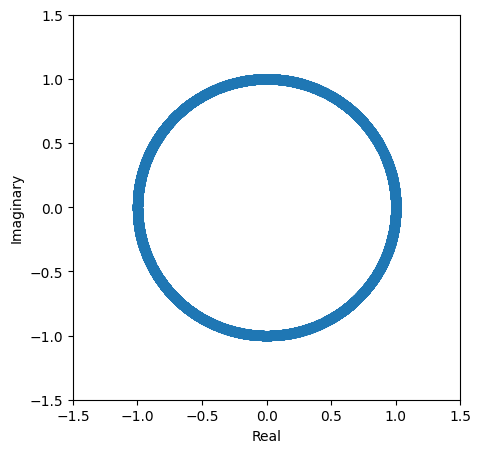

(201, 201)


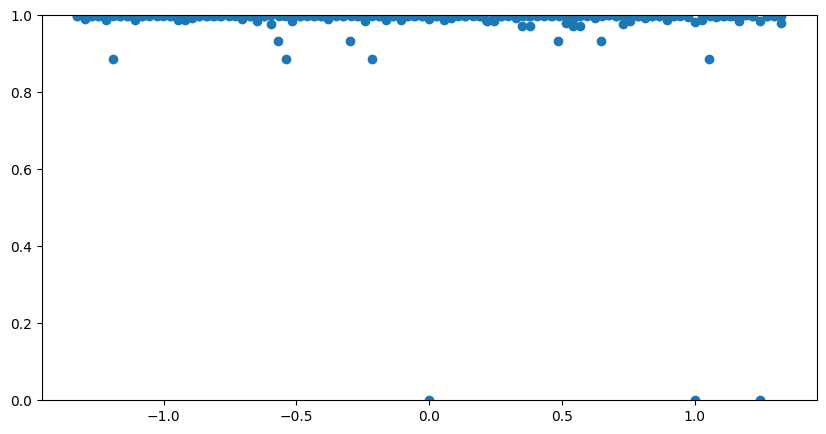

In [3]:
kwargs = {
    'degree': 100,
    'num_col': 10**4,
    'n_dim': 1,
    'initial_state': np.array([0]),
    'frequencies': np.array([np.sqrt(2)/10]),
}
t = Test(**kwargs)
t.test_run()

In [4]:
t.special_idxes

[0, 82, 199]

In [5]:
k = 0
Ph = lambda x: t.basis(x)@t.V[:,k]
df3 = t.get_E3_error(Ph, t.L)
df3

,n,is_in_eigenvalue,is_same,diff_norm
0,0,False,True,0.00e+00
1,1,True,False,2.67e-04
2,2,False,False,5.33e-04
3,3,False,False,7.98e-04
4,4,False,False,1.06e-03
5,5,False,False,1.33e-03
6,6,False,False,1.59e-03
7,7,False,False,1.85e-03
8,8,False,False,2.12e-03
9,9,False,False,2.38e-03


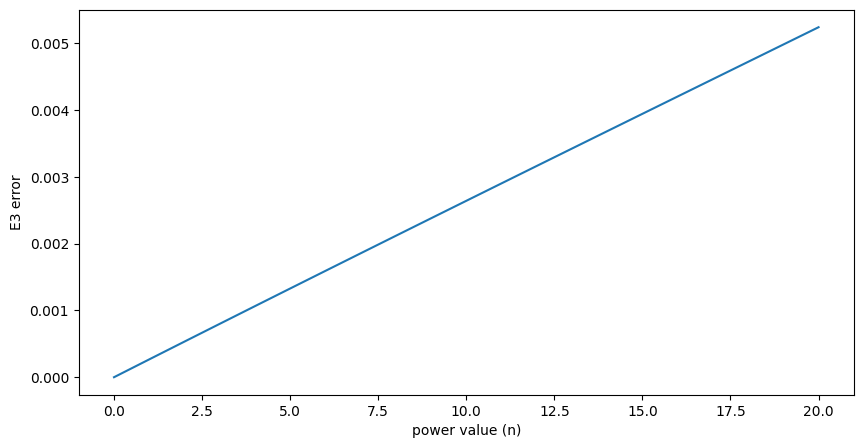

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df3.n, df3.diff_norm)
ax.set_xlabel('power value (n)')
ax.set_ylabel('E3 error')
plt.show()

In [7]:
t.frequencies

array([0.14142136])

In [8]:
t.initial_state

array([0])

n_inv=1, norm=102368.5, time_taken=185.65832710266113
n_inv=21, norm=455982.23, time_taken=167.3634490966797
n_inv=41, norm=170.59, time_taken=154.30092597007751
n_inv=61, norm=633.69, time_taken=133.55642700195312
n_inv=81, norm=5752.7, time_taken=116.91709327697754
n_inv=101, norm=3793.65, time_taken=101.13554406166077
n_inv=121, norm=1237.7, time_taken=86.40173602104187
n_inv=141, norm=245.29, time_taken=69.83159589767456
n_inv=161, norm=204.02, time_taken=49.665398836135864
n_inv=181, norm=13806.42, time_taken=35.083030223846436
n_inv=201, norm=0.03, time_taken=20.31101632118225


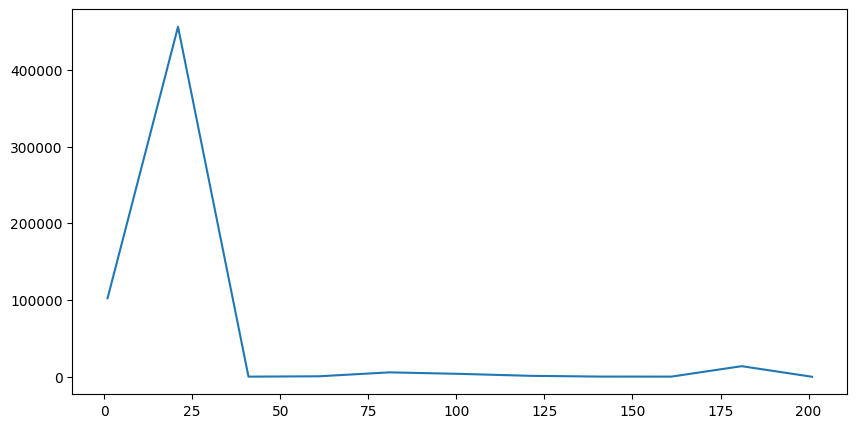

In [9]:
df4 = t.show_E4_error(t.K, t.L)

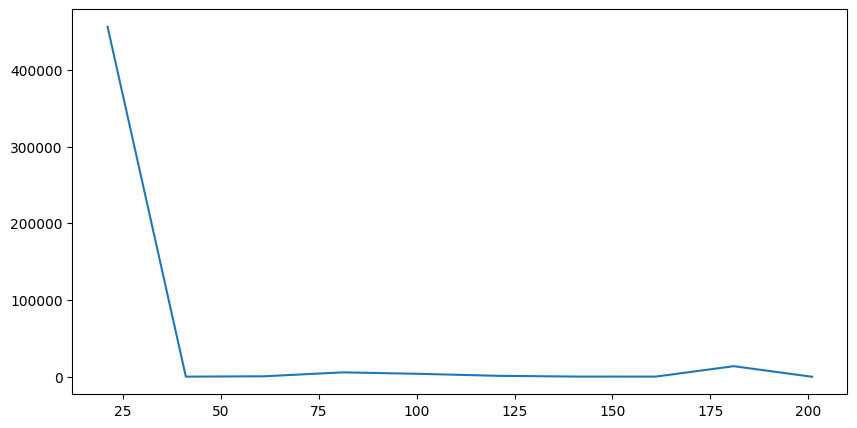

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df4.n_inv.iloc[1:], df4.error.iloc[1:])
plt.show()

In [11]:
df4

,n_inv,error,time
0,1,102368.50,185.66
1,21,455982.23,167.36
2,41,170.59,154.30
3,61,633.69,133.56
4,81,5752.70,116.92
5,101,3793.65,101.14
6,121,1237.70,86.40
7,141,245.29,69.83
8,161,204.02,49.67
9,181,13806.42,35.08
